<h1 align="center">Analizando los repositorios de los proyectos DeFi más populares</h1>

El objetivo de este notebook es analizar los repositorios de los proyectos DeFí más populares, con el fin de aportar a quienes quieran colaborar o crear un proyecto de este tipo, datos sobre el código de los proyectos.
Los proyectos analizados son los mostrados en el mapa de proyectos DeFi.
Fuente: https://www.theblockcrypto.com/genesis/15376/mapping-out-ethereums-defi
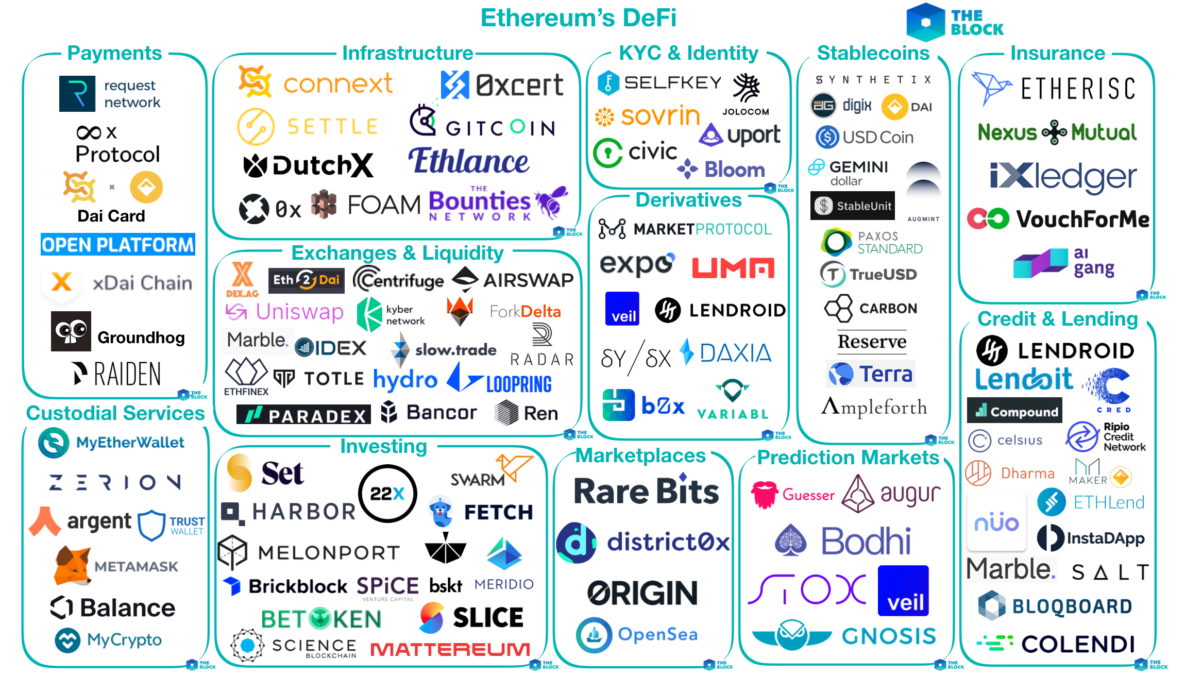

<h3 align="center">Carga del dataset</h3>

In [1]:
import pandas as pd

df = pd.read_csv('/home/ivan/Escritorio/Repo/DefiPy/out.csv', sep=';')
df.head(5)

,repo_name,project,language,description,open_issues_count,subscribers_count,watchers_count,stargazers_count,created_at,forks_count,has_wiki,size,updated_at
0,blockchain-engineer-recruitement-test,RequestNetwork,JavaScript,Request Network blockchain engineer recruitmen...,0,4,0,0,2018-11-15 07:38:10,0,True,70,2019-01-10 04:56:39
1,central,RequestNetwork,TypeScript,A website to distribute test tokens on Rinkeby...,0,8,1,1,2018-04-10 06:56:26,0,False,550,2019-12-17 03:27:40
2,crowdfunding,RequestNetwork,JavaScript,A tool to create censorship-resistant crowdfun...,14,9,7,7,2018-04-20 10:41:01,1,False,1617,2019-06-01 21:41:55
3,documentation,RequestNetwork,NaN,This repository holds the content displayed on...,1,11,6,6,2018-05-01 07:22:31,9,False,3126,2020-02-11 07:51:36
4,donations.request.network,RequestNetwork,JavaScript,Landing page for https://donations.request.net...,0,9,4,4,2018-10-24 15:34:35,1,False,5014,2019-09-14 14:09:51


<h3 align="center">Descripción del dataset</h3>
Para evaluar los proyectos se han obtenido datos mediante el API de Github, recopilando todos los repositorios que componen cada proyecto, excluyendo de los mismos, los que son forks de otros proyectos. De estos repositorios se han almacenado en el dataset las siguientes característas:

In [2]:
df.columns

Index(['repo_name', 'project', 'language', 'description', 'open_issues_count',
       'subscribers_count', 'watchers_count', 'stargazers_count', 'created_at',
       'forks_count', 'has_wiki', 'size', 'updated_at'],
      dtype='object')

<h3 align="center">Proyectos incluidos en el análisis</h3>
De la lista anterior, se incliyen los proyectos que son opensource y tienen sus repositorios en github, en total existen 68 diferentes proyectos

In [3]:
df.project.describe()

count         1627
unique          68
top       makerdao
freq           153
Name: project, dtype: object

<h3 align="center">¿Cuantos repositorios tienen de media cada proyecto?</h3>

In [4]:
import numpy as np
group_by_repositories = df[['project','repo_name']].groupby('project').count()
print('Media de repositorios por proyecto:', np.median(group_by_repositories.repo_name.values))

Media de repositorios por proyecto: 14.0


<h3 align="center">¿Cuales son los proyectos con más repositorios?</h3>

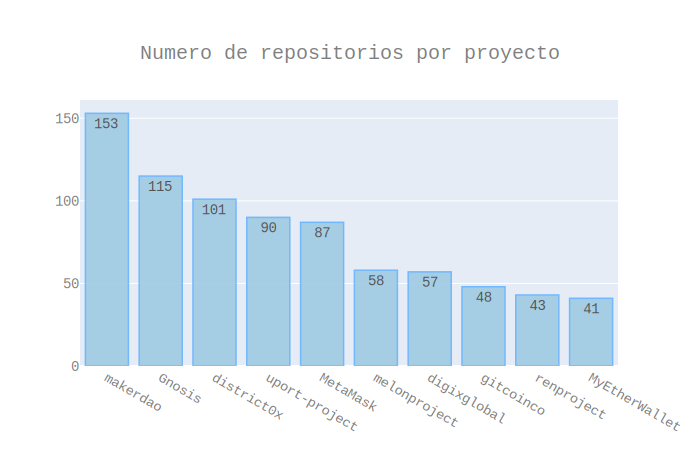

In [5]:
import plotly.graph_objects as go

def show_bar_plot(x,y,title):
    fig = go.Figure(data=[go.Bar(x=x, y=y,text=y,textposition='auto')])
    fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(102,178,255)',
    marker_line_width=1.5, opacity=0.9)
    fig.update_layout(
        title={
            'text':title, 
            'y':0.9, 
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        font=dict(
            family="Courier New, monospace",
            size=14,
            color="#7f7f7f"
        ))
    fig.show(renderer="svg")

repositories = group_by_repositories.sort_values('repo_name', ascending=False).iloc[0:10]
show_bar_plot(repositories.index, repositories.repo_name, 'Numero de repositorios por proyecto')

<h3 align="center">¿Cuales son los lenguajes más utilizados?</h3>

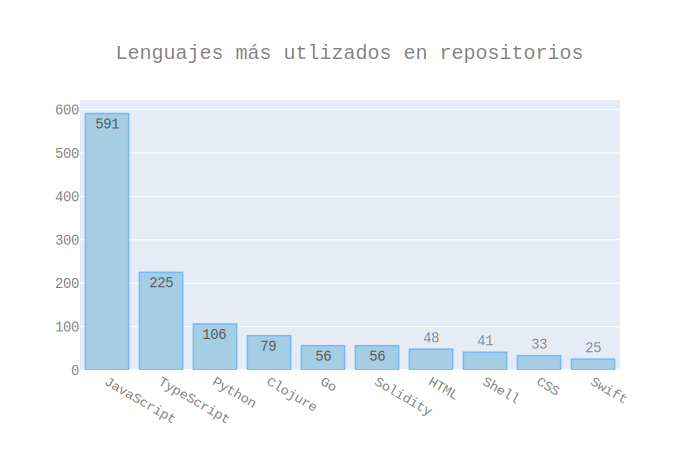

In [6]:
show_bar_plot(df.language.value_counts()[0:10].index, df.language.value_counts()[0:10].values, 
              'Lenguajes más utlizados en repositorios')

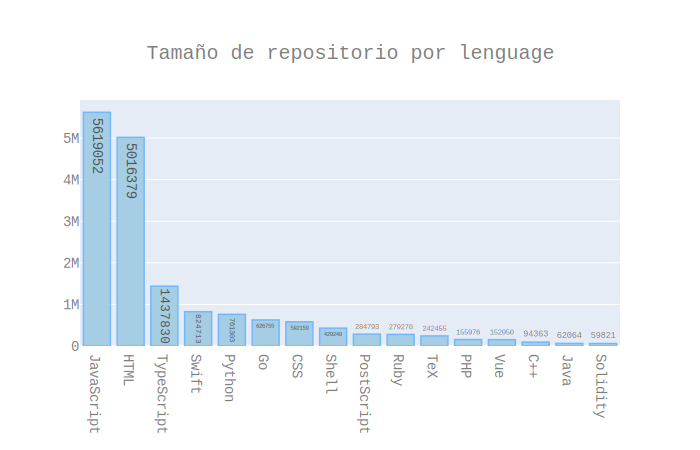

In [7]:
grouped_language_size = df[['language','size']].groupby('language').sum()
top_size = grouped_language_size.sort_values('size', ascending=False).iloc[0:16]
show_bar_plot(top_size.index, top_size['size'], 'Tamaño de repositorio por lenguage')

In [8]:
df_dates = df[['project','created_at']]
df_dates_first = df_dates.sort_values(df_dates.columns.tolist()).drop_duplicates(
    subset=['project'], keep='first')

df_dates_first.sort_values('created_at', ascending=True).iloc[0:10]

,project,created_at
951,Veil-Framework,2013-05-18 21:03:01
1238,AugurProject,2014-12-06 05:42:19
1121,digixglobal,2015-07-13 01:00:53
176,MetaMask,2015-07-24 01:07:38
894,jolocom,2015-07-29 20:50:26
63,MyEtherWallet,2015-08-11 05:19:47
948,MeetLima,2015-08-19 13:15:18
1490,makerdao,2015-09-15 20:06:53
865,uport-project,2016-03-28 19:29:01
97,zeriontech,2016-05-19 16:28:29


<h3 align="center">¿Cuales son los repositorios que más gustan?</h3>
<br>
<div align="center">
-Repositorios con más estrellas<br>
-Repositorios con más forks<br>
-Repositorios con más seguidores
</div>

In [9]:
df[['project','repo_name','stargazers_count']].sort_values('stargazers_count',ascending=False).iloc[0:10]

,project,repo_name,stargazers_count
164,MetaMask,metamask-extension,3566
63,MyEtherWallet,etherwallet,2244
949,Veil-Framework,Veil,1916
951,Veil-Framework,Veil-Evasion,1491
26,0xProject,0x-monorepo,1187
214,trustwallet,trust-wallet-ios,1181
359,gitcoinco,web,838
257,MyCryptoHQ,MyCrypto,746
657,melonproject,oyente,726
1327,Gnosis,MultiSigWallet,721


In [10]:
df[['project','repo_name','forks_count']].sort_values('forks_count',ascending=False).iloc[0:10]

,project,repo_name,forks_count
63,MyEtherWallet,etherwallet,1705
207,trustwallet,tokens,1529
164,MetaMask,metamask-extension,1294
62,MyEtherWallet,ethereum-lists,938
951,Veil-Framework,Veil-Evasion,647
199,trustwallet,assets,644
949,Veil-Framework,Veil,507
359,gitcoinco,web,491
1327,Gnosis,MultiSigWallet,487
214,trustwallet,trust-wallet-ios,443


In [11]:
df[['project','repo_name','subscribers_count']].sort_values('subscribers_count',ascending=False).iloc[0:10]

,project,repo_name,subscribers_count
164,MetaMask,metamask-extension,242
951,Veil-Framework,Veil-Evasion,198
63,MyEtherWallet,etherwallet,184
949,Veil-Framework,Veil,138
149,MetaMask,faq,119
1238,AugurProject,augur-core,101
214,trustwallet,trust-wallet-ios,95
26,0xProject,0x-monorepo,87
1241,AugurProject,augur-ui,84
257,MyCryptoHQ,MyCrypto,66


<h3 align="center">¿Cuales son los proyectos que más gustan?</h3>
<br>
<div align="center">
Agrupando todos los repositorios que contiene un proyecto y sumando sus estrellas, forks y suscriptores, ¿Que proyecto tiene más?
</div>


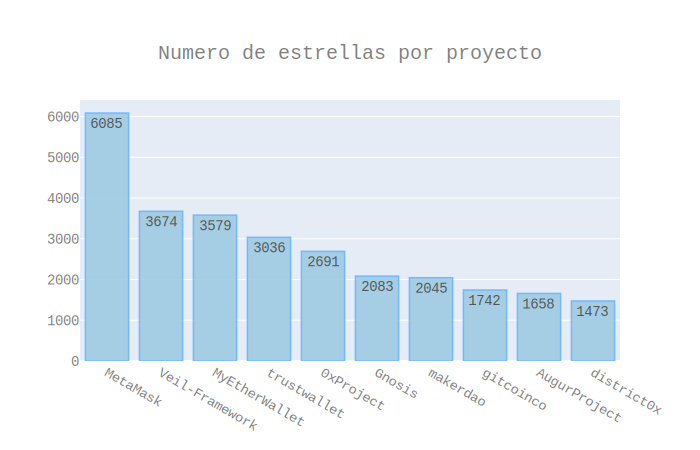

In [21]:
group_by_project = df.groupby('project').sum()
stars = group_by_project[['stargazers_count']].sort_values('stargazers_count',ascending=False).iloc[0:10]
show_bar_plot(stars.index, stars.stargazers_count, 'Numero de estrellas por proyecto')

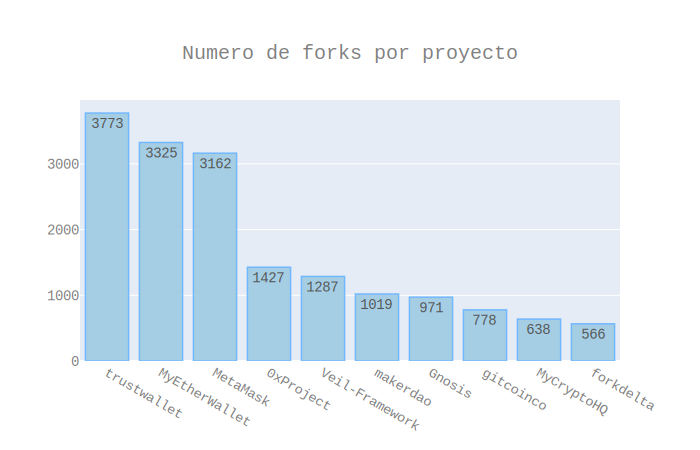

In [22]:
forks = group_by_project[['forks_count']].sort_values('forks_count',ascending=False).iloc[0:10]
show_bar_plot(forks.index, forks.forks_count, 'Numero de forks por proyecto')

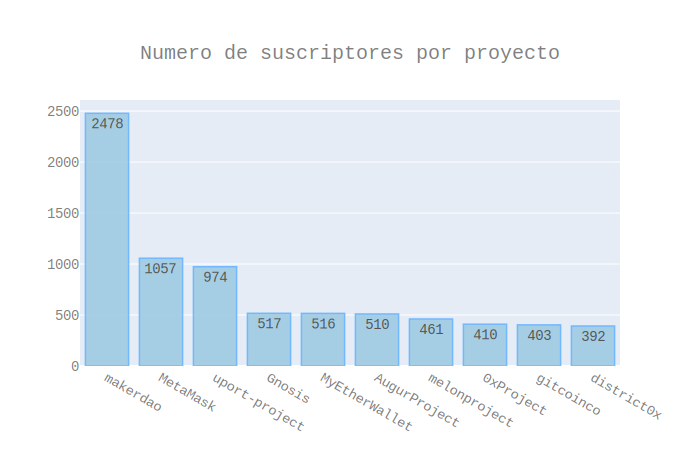

In [23]:
subscribers = group_by_project[['subscribers_count']].sort_values('subscribers_count',ascending=False).iloc[0:10]
show_bar_plot(subscribers.index, subscribers.subscribers_count, 'Numero de suscriptores por proyecto')

<h3 align="center">¿Cuantas issues tienen los repositorios?</h3>

<h3 align="center">¿Cuantas issues tienen proyectos agrupando por repositorio?</h3>